# **Business Case: Delhivery - Feature Engineering**

**About Delhivery:** Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

**Problem Statement:** Delhivery wants to process raw data from their data pipelines to support forecasting models. This involves:
* Cleaning and manipulating the raw data.
* Extracting useful features for model-building and business insight.
* Aggregating multiple rows of trip data effectively.

In [1427]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv

--2024-09-26 15:02:20--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.181, 13.224.9.129, 13.224.9.103, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv.16’

delhivery_data.csv. 100%[===================>]  53.04M   169MB/s    in 0.3s    

2024-09-26 15:02:20 (169 MB/s) - ‘delhivery_data.csv.16’ saved [55617130/55617130]



In [1428]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


import warnings
warnings.filterwarnings('ignore')


In [1429]:
# Reading the dataset
df = pd.read_csv('delhivery_data.csv')

**Analyzing the data**

In [1430]:
df.shape

(144867, 24)

In [1431]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [1432]:
df.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [1433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Data  Cleaning:**
* Checking for Duplicates and if exists handling them
* Identiying Missing Values
* Handling Missing Values
* Dropping unnecessary columns
* Converting the columns into appropriate data types



In [1434]:
# Checking for Duplicates
df.duplicated().sum()

0

In [1435]:
df.nunique() # 144867 rows in total

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [1436]:
# missing value calculation
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [1437]:
round((df.isnull().sum() / len(df))*100,2) # missing values in percentage

,0
data,0.00
trip_creation_time,0.00
route_schedule_uuid,0.00
route_type,0.00
trip_uuid,0.00
source_center,0.00
source_name,0.20
destination_center,0.00
destination_name,0.18
od_start_time,0.00


In [1438]:
df.dropna(inplace=True) # Since the percentage of null is less than 1% we prefer dropping null values.

In [1439]:
round((df.isnull().sum() / len(df))*100,2) # after removing null values.

,0
data,0.0
trip_creation_time,0.0
route_schedule_uuid,0.0
route_type,0.0
trip_uuid,0.0
source_center,0.0
source_name,0.0
destination_center,0.0
destination_name,0.0
od_start_time,0.0


In [1440]:
# Data Reduction
# Dropping Unnecessary Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

In [1441]:
datetime_columns= ["trip_creation_time","od_start_time","od_end_time"]
for i in datetime_columns:
  df[i]=pd.to_datetime(df[i])

In [1442]:
df["data"]=df["data"].astype("category")
df["route_type"]=df["route_type"].astype("category")

In [1443]:
unknown_columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df.drop(unknown_columns, axis=1, inplace=True)

In [1444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

**Feature Engineering:**
* Converting the raw data into meaningful data.
* Creation of new fields from the existing fields

In [1445]:
# Feature Engineering
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [1446]:
# grouping the data by "trip_uuid","source_center","destination_center"
grouping_features= ["trip_uuid","source_center","destination_center"]
group_df1 = df.groupby(by=grouping_features, as_index=False).agg({"data":"first",
                                                "trip_creation_time": "first",
                                                "route_type":"first",
                                                "source_name":"first",
                                                "destination_name":"first",
                                                "od_start_time":"first",
                                                "od_end_time":"first",
                                                "start_scan_to_end_scan":"first",
                                                "actual_distance_to_destination":"last",
                                                "actual_time":"last",
                                                "osrm_time":"last",
                                                "osrm_distance":"last",
                                                "segment_actual_time":"sum",
                                                "segment_osrm_time":"sum",
                                                "segment_osrm_distance":"sum"})

In [1447]:
group_df1

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,test,2018-10-03 23:59:42.701692,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [1448]:
# Calculating total time taken for the trip
group_df1["od_total_time"] = group_df1["od_end_time"] - group_df1["od_start_time"]
group_df1["od_total_time"] = group_df1["od_total_time"].apply(lambda x: round(x.total_seconds()/60.0,2))

In [1449]:
group_df1

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,834.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,62.12
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,91.09
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,44.17
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,test,2018-10-03 23:59:42.701692,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,287.47


In [1450]:
group_df1.drop(columns=["od_start_time","od_end_time"],inplace=True) # dropping the columns as they are not necessary

In [1451]:
# grouping the grouped data obtained by "trip_uuid"
group_df2 = group_df1.groupby(by="trip_uuid", as_index=False).agg({"data":"first",
                                                "trip_creation_time": "first",
                                                "route_type":"first",
                                                "source_name":"first",
                                                "destination_name":"last",
                                                "start_scan_to_end_scan":"sum",
                                                "actual_distance_to_destination":"sum",
                                                "actual_time":"sum",
                                                "osrm_time":"sum",
                                                "osrm_distance":"sum",
                                                "segment_actual_time":"sum",
                                                "segment_osrm_time":"sum",
                                                "segment_osrm_distance":"sum",
                                                "od_total_time":"sum"})

In [1452]:
# Obtaining the meaningul data
df = group_df2

In [1453]:
df.head()

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2260.11
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,181.61
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3934.36
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.49
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,718.34


In [1454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_type                      14787 non-null  category      
 4   source_name                     14787 non-null  object        
 5   destination_name                14787 non-null  object        
 6   start_scan_to_end_scan          14787 non-null  float64       
 7   actual_distance_to_destination  14787 non-null  float64       
 8   actual_time                     14787 non-null  float64       
 9   osrm_time                       14787 non-null  float64       
 10  osrm_distance                   14787 non-null  float64       
 11  se

In [1455]:
 # Extracting City, Place, State

location_name = "Kanpur_Central_H_6 (Uttar Pradesh)"

def extract_state(location_name):
  city_part, state_part = location_name.split("(")
  state = state_part.replace(")", "")
  return state

def extract_city(location_name):
  city_part, state_part = location_name.split("(")
  city = city_part.split("_")[0]
  return city

def extract_place(location_name):
  city_part, state_part = location_name.split("(")
  place = city_part.split("_")[1:]
  place = "_".join(place)
  return place


In [1456]:
# Extracting City, Place, State from source_name feature
df["source_state"] = df["source_name"].apply(extract_state)
df["source_city"] = df["source_name"].apply(extract_city)
df["source_place"] = df["source_name"].apply(extract_place)

In [1457]:
# Extracting City, Place, State from destination_name feature
df["destination_state"] = df["destination_name"].apply(extract_state)
df["destination_city"] = df["destination_name"].apply(extract_city)
df["destination_place"] = df["destination_name"].apply(extract_place)

In [1458]:
# Extracting day, month, year, hour from Trip Creation Date
df['trip_creation_day'] = pd.to_datetime(df['trip_creation_time']).dt.strftime('%a')
df['trip_creation_month'] = pd.to_datetime(df['trip_creation_time']).dt.strftime('%b')
df['trip_creation_year'] = pd.to_datetime(df['trip_creation_time']).dt.year
df["trip_creation_hour"]=df["trip_creation_time"].dt.hour

In [1459]:
df # Obtained meaningful data with additional features which were calculated using existing features

,trip_uuid,data,trip_creation_time,route_type,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,source_state,source_city,source_place,destination_state,destination_city,destination_place,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,1562.0,717.0,...,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,Wed,Sep,2018,0
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,143.0,68.0,...,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,Wed,Sep,2018,0
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,3347.0,1740.0,...,Haryana,Gurgaon,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,Wed,Sep,2018,0
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,...,Maharashtra,Mumbai Hub,,Maharashtra,Mumbai,MiraRd_IP,Wed,Sep,2018,0
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,341.0,117.0,...,Karnataka,Bellary,Dc,Karnataka,Sandur,WrdN1DPP_D,Wed,Sep,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),257.0,57.762332,83.0,62.0,...,Punjab,Chandigarh,Mehmdpur_H,Punjab,Chandigarh,Mehmdpur_H,Wed,Oct,2018,23
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,12.0,...,Haryana,FBD,Balabhgarh_DPC,Haryana,Faridabad,Blbgarh_DC,Wed,Oct,2018,23
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,Carting,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,38.684839,282.0,48.0,...,Uttar Pradesh,Kanpur,GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr_DC,Wed,Oct,2018,23
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,134.723836,264.0,179.0,...,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Tamil Nadu,Tirchchndr,Shnmgprm_D,Wed,Oct,2018,23


In [1460]:
df.shape

(14787, 25)

In [1461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_type                      14787 non-null  category      
 4   source_name                     14787 non-null  object        
 5   destination_name                14787 non-null  object        
 6   start_scan_to_end_scan          14787 non-null  float64       
 7   actual_distance_to_destination  14787 non-null  float64       
 8   actual_time                     14787 non-null  float64       
 9   osrm_time                       14787 non-null  float64       
 10  osrm_distance                   14787 non-null  float64       
 11  se

In [1462]:
# Dropping unwanted columns
unwanted_columns = ["trip_creation_time","source_name","destination_name"]
df.drop(unwanted_columns, axis=1, inplace=True)

In [1463]:
# converting date fields to object
df["trip_creation_day"] = df["trip_creation_day"].astype("object")
df["trip_creation_month"] = df["trip_creation_month"].astype("object")
df["trip_creation_year"] = df["trip_creation_year"].astype("object")
df["trip_creation_hour"] = df["trip_creation_hour"].astype("object")

In [1464]:
# Final check for nulls in percentage
round((df.isnull().sum() / len(df))*100,2)

,0
trip_uuid,0.0
data,0.0
route_type,0.0
start_scan_to_end_scan,0.0
actual_distance_to_destination,0.0
actual_time,0.0
osrm_time,0.0
osrm_distance,0.0
segment_actual_time,0.0
segment_osrm_time,0.0


In [1465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   trip_uuid                       14787 non-null  object  
 1   data                            14787 non-null  category
 2   route_type                      14787 non-null  category
 3   start_scan_to_end_scan          14787 non-null  float64 
 4   actual_distance_to_destination  14787 non-null  float64 
 5   actual_time                     14787 non-null  float64 
 6   osrm_time                       14787 non-null  float64 
 7   osrm_distance                   14787 non-null  float64 
 8   segment_actual_time             14787 non-null  float64 
 9   segment_osrm_time               14787 non-null  float64 
 10  segment_osrm_distance           14787 non-null  float64 
 11  od_total_time                   14787 non-null  float64 
 12  source_state      

**Exploratory Data Analysis:**
* Separating Numerical and Categorical columns for analysis.
* Performing In-Depth Analysis.
* Hypothesis Testing to validate the trends.

In [1466]:
# Separating numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Separating categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'od_total_time'],
      dtype='object')
Categorical columns: Index(['trip_uuid', 'data', 'route_type', 'source_state', 'source_city',
       'source_place', 'destination_state', 'destination_city',
       'destination_place', 'trip_creation_day', 'trip_creation_month',
       'trip_creation_year', 'trip_creation_hour'],
      dtype='object')


In [1467]:
for i in categorical_columns:
  print(df[i].value_counts())
  print("-"*100)

trip_uuid
trip-153671041653548748    1
trip-153791166614583191    1
trip-153791188846803726    1
trip-153791199511952768    1
trip-153791203866379915    1
                          ..
trip-153730334220215546    1
trip-153730343361346090    1
trip-153730345417711989    1
trip-153730351817227074    1
trip-153861118270144424    1
Name: count, Length: 14787, dtype: int64
----------------------------------------------------------------------------------------------------
data
training    10645
test         4142
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
route_type
Carting    8906
FTL        5881
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
source_state
Maharashtra               2714
Karnataka                 2143
Haryana                   1823
Tamil Nadu                1039
Telangana                  784
Uttar Pradesh          

In [1468]:
for i in categorical_columns:
  print(i)
  print(df[i].unique())
  print("-"*100)

trip_uuid
['trip-153671041653548748' 'trip-153671042288605164'
 'trip-153671043369099517' ... 'trip-153861106442901555'
 'trip-153861115439069069' 'trip-153861118270144424']
----------------------------------------------------------------------------------------------------
data
['training', 'test']
Categories (2, object): ['test', 'training']
----------------------------------------------------------------------------------------------------
route_type
['FTL', 'Carting']
Categories (2, object): ['Carting', 'FTL']
----------------------------------------------------------------------------------------------------
source_state
['Uttar Pradesh' 'Karnataka' 'Haryana' 'Maharashtra' 'Tamil Nadu'
 'Gujarat' 'Delhi' 'Telangana' 'Rajasthan' 'Assam' 'Madhya Pradesh'
 'West Bengal' 'Andhra Pradesh' 'Punjab' 'Chandigarh' 'Goa' 'Jharkhand'
 'Pondicherry' 'Orissa' 'Uttarakhand' 'Himachal Pradesh' 'Kerala'
 'Arunachal Pradesh' 'Bihar' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Jammu & Kashmir' 'Mizor

In [1469]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
od_total_time,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000


In [1470]:
df.describe(include='object').T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153671041653548748,1
source_state,14787,29,Maharashtra,2714
source_city,14787,731,Gurgaon,1128
source_place,14787,756,Bilaspur_HB,1052
destination_state,14787,31,Maharashtra,2561
destination_city,14787,856,Bengaluru,1088
destination_place,14787,844,Bilaspur_HB,821
trip_creation_day,14787,7,Wed,2731
trip_creation_month,14787,2,Sep,13011
trip_creation_year,14787,1,2018,14787


**Outlier Identification**

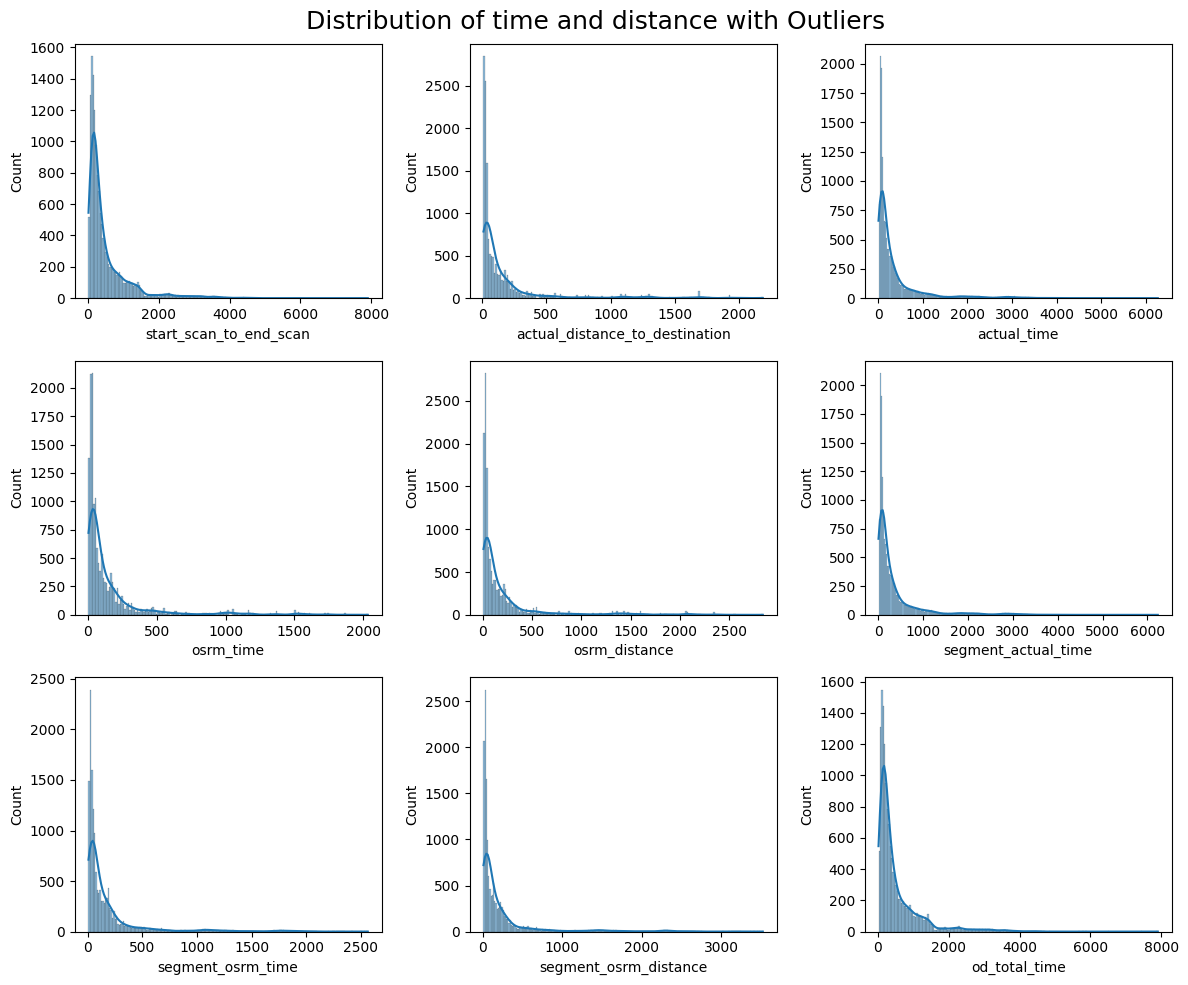

In [1471]:
# Identiying the distribution of numerical variables before removing outliers
plt.figure(figsize = (12, 10))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[numerical_columns[i]], kde = True)
    plt.plot()

plt.suptitle("Distribution of time and distance with Outliers", size = 18, fontweight = "medium")
plt.tight_layout()
plt.show()

**Observations:**
* It can be inferred from the above plots that data in all the numerical columns are right skewed.

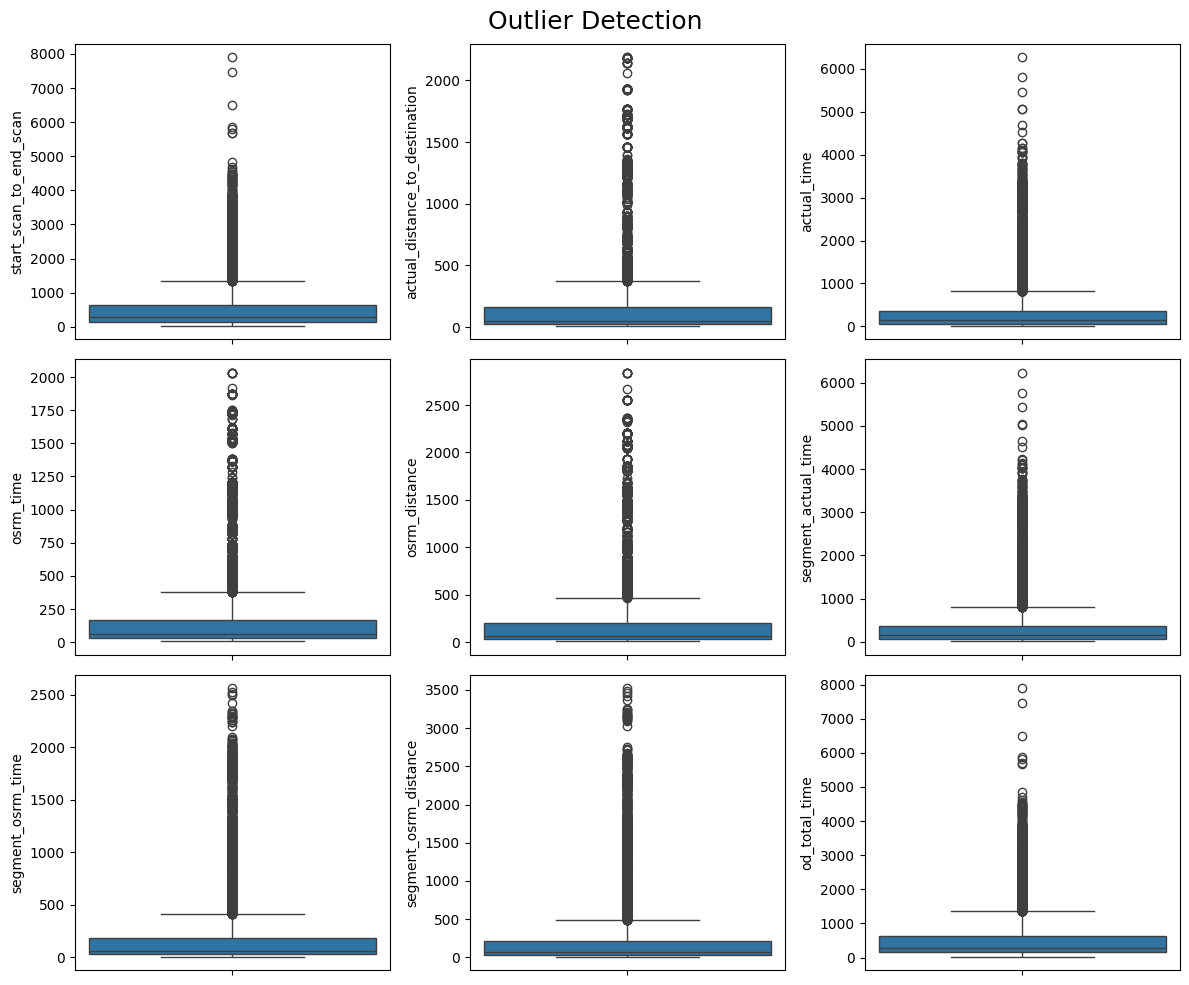

In [1472]:
# Visual Analysis of Outliers
plt.figure(figsize = (12, 10))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df[numerical_columns[i]])
    plt.plot()

plt.suptitle("Outlier Detection", size = 18, fontweight = "medium")
plt.tight_layout()
plt.show()

**Observations:**
* It can be clearly seen in the above plots that there are outliers in all the numerical columns that need to be treated.

**Outlier Treatment**

In [1473]:
# Outlier Removal using IQR method
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [1474]:
df = remove_outliers(df, numerical_columns)
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)
df.shape

(8734, 22)

**Graphical Analysis**

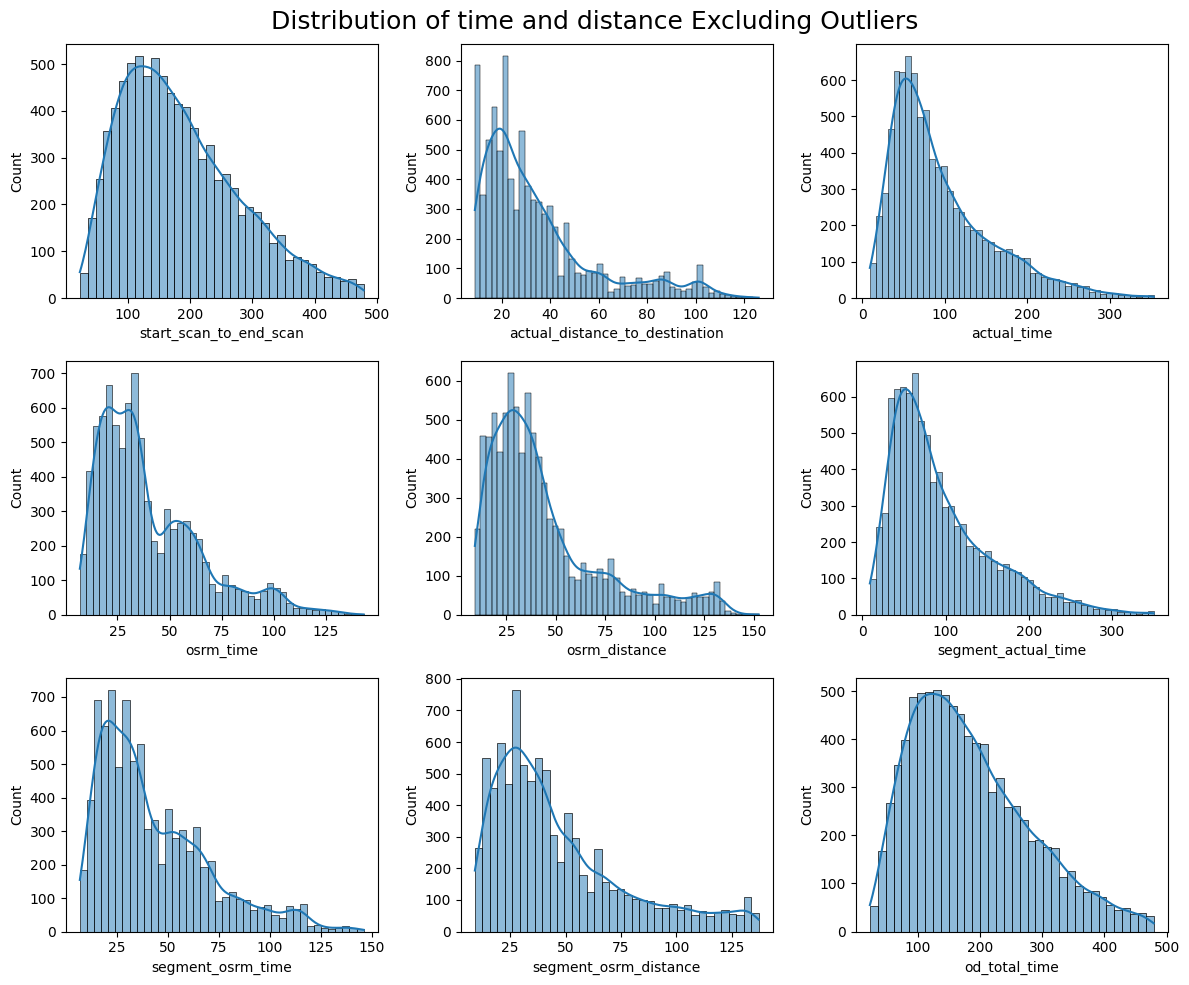

In [1475]:
# Distribution of numerical variables after removing outliers
plt.figure(figsize = (12, 10))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[numerical_columns[i]], kde = True)
    plt.plot()

plt.suptitle("Distribution of time and distance Excluding Outliers", size = 18, fontweight = "medium")
plt.tight_layout()
plt.show()

**Observations**

1.   After handling the outliers, all the time and distance data is observed to follow normal distribution.
2. The mean time taken for delivery is significantly different between total time and actual time.
2.   The mean time taken for delivery is significantly different between actual time and osrm time.
3. The mean time for osrm and segment_osrm times are observed to be similar.
4. The mean distance between actual distance and osrm distance is observed to be similar.



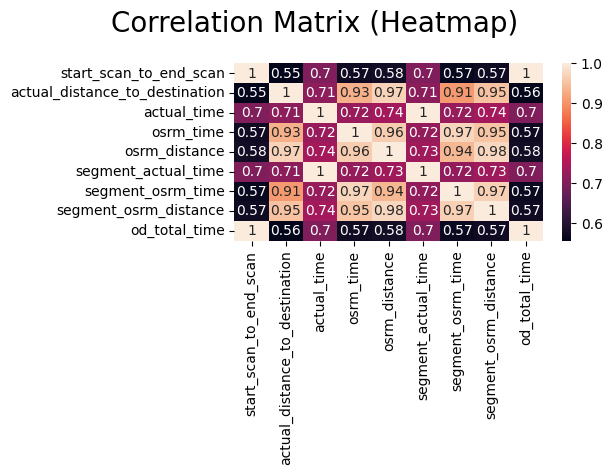

In [1476]:
sns.heatmap(df.corr(numeric_only=True, method='spearman'), annot = True)

plt.suptitle("Correlation Matrix (Heatmap)", size = 20, fontweight = "medium")
plt.tight_layout()
plt.show()

**Observations**

1.   Correlation between actual distance and actual time is lesser than the correlation between osrm distance and osrm time.
2.   The actual distance, osrm distance and segment osrm distance are positively highly correlated which explains the accuracy of osrm application.
3. The total time recorded as the start to end scan for completion of delivery has lesser positive correlation with Actual time which signifies there is some delay in updating the delivery/pick-up as complete immediately after completion (*total_time > actual_time*).
3. There is lesser positive correlation between actual time and osrm time which might signify other factors involved in causing the delay in delivery/pick-ups (*actual_time > osrm_time*).

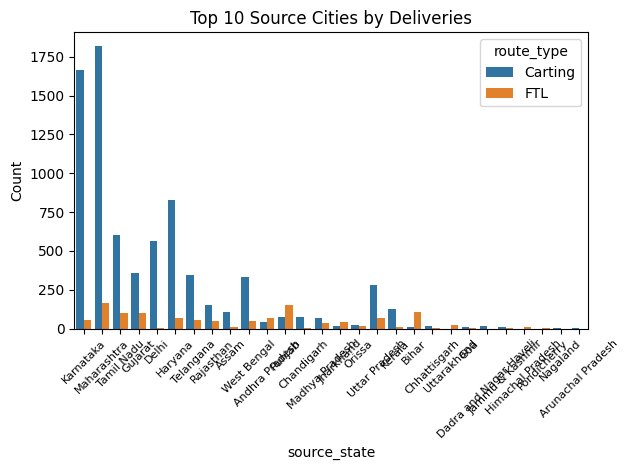

In [1477]:
sns.countplot(data=df, x='source_state', hue='route_type')
plt.title('Top 10 Source Cities by Deliveries')
plt.ylabel('Count')
plt.xticks(fontsize=8, rotation = 45)
plt.tight_layout()
plt.show()

In [1478]:
state_route = df.groupby(['source_state','route_type'])['trip_uuid'].count().reset_index()
state_route.head()

,source_state,route_type,trip_uuid
0,Andhra Pradesh,Carting,40
1,Andhra Pradesh,FTL,65
2,Arunachal Pradesh,Carting,1
3,Arunachal Pradesh,FTL,0
4,Assam,Carting,109


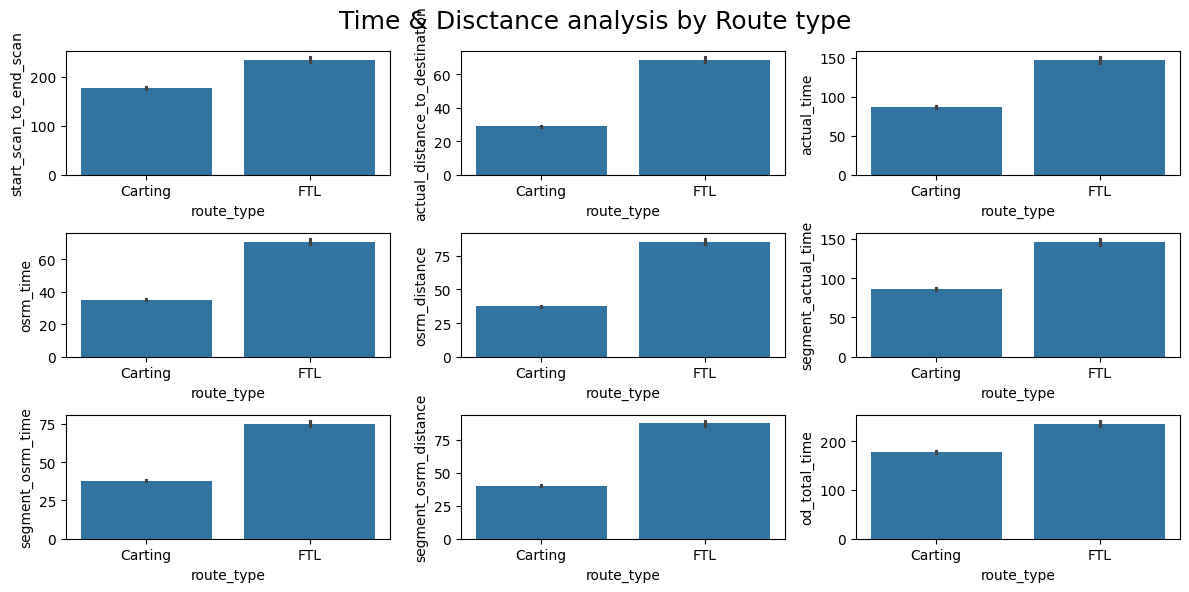

In [1479]:
plt.figure(figsize = (12, 6))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    sns.barplot(data=df, x = 'route_type', y = df[numerical_columns[i]])
    plt.plot()

plt.suptitle("Time & Disctance analysis by Route type", size = 18, fontweight = "medium")
plt.tight_layout()
plt.show()

**Observations**
1.   The route type - Carting takes more time ~125 minutes to deliver/pick-up compared to FTL which takes ~110 minutes.
2. The actual time taken to deliver via Carting (~ 65 mins) is greater than the time estimated by osrm system (~ 30 mins).
2. The total time logged for carting type (~ 125 mins) is much greater than the actual time (~ 65 mins).
4. The total time and actual time taken by FTL type (~ 110 mins) is also greater than estimated osrm time (~ 40 mins).
5. The actual distance logged is almost similar to the estimated osrm distance for Carting (~ 25 / 32 mins ) and FTL types (~ 38 / 43 mins).



In [1480]:
# City and State Delivery counts by Route Type
state_route = df.groupby(['source_state','route_type'])['trip_uuid'].count().reset_index()
state_route = state_route.sort_values(by='trip_uuid', ascending=False)

city_route = df.groupby(['source_city','route_type'])['trip_uuid'].count().reset_index()
city_route = city_route.sort_values(by='trip_uuid', ascending=False)

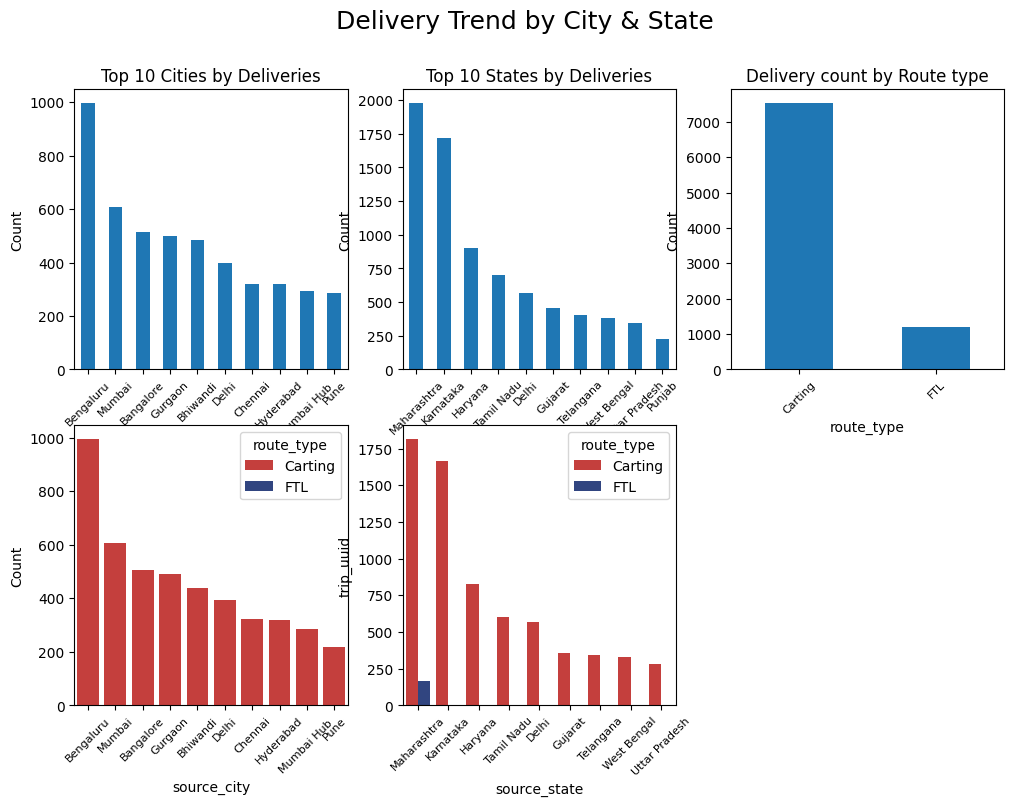

In [1481]:

aero_blue = "#243e8d"
aero_grey = "#808080"
aero_red = "#db2926"
colors = [aero_red, aero_blue]

plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
df['source_city'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities by Deliveries')
plt.ylabel('Count')
plt.xticks(fontsize=8, rotation = 45)

plt.subplot(2,3,2)
df['source_state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 States by Deliveries')
plt.ylabel('Count')
plt.xticks(fontsize=8, rotation = 45)

plt.subplot(2,3,3)
df['route_type'].value_counts().plot(kind='bar')
plt.title('Delivery count by Route type')
plt.ylabel('Count')
plt.xticks(fontsize=8, rotation = 45)

plt.subplot(2,3,4)
sns.barplot(data=city_route.head(10), x='source_city', y='trip_uuid', hue='route_type', palette=colors)
plt.ylabel('Count')
plt.xticks(fontsize=8, rotation = 45)

plt.subplot(2,3,5)
sns.barplot(data=state_route.head(10), x='source_state', y='trip_uuid', hue='route_type', palette=colors)
plt.xticks(fontsize=8, rotation = 45)

plt.suptitle("Delivery Trend by City & State", size = 18, fontweight = "medium")
plt.show()

**Observations**
1.   Top cities by count of trips include Bengaluru, Mumbai, Delhi, Bhiwandi, Chennai, Hyderabad, etc.
2. Top states by count of trips include Karnataka, Maharashtra, Tamilnadu, etc.
2.   Carting type contributes to most number of deliveries.
4. Maharashtra, Karnataka and Tamilnadu has highest carting type deliveries and Karnataka, Andhra Pradesh, Bihar and Tamilnadu contribute to highest number of FTL type deliveries.



In [1482]:
df_day=df.groupby(by="trip_creation_day")["trip_uuid"].count().to_frame().reset_index()
df_day.head()

,trip_creation_day,trip_uuid
0,Fri,1223
1,Mon,1166
2,Sat,1322
3,Sun,982
4,Thu,1244


<Figure size 640x480 with 0 Axes>

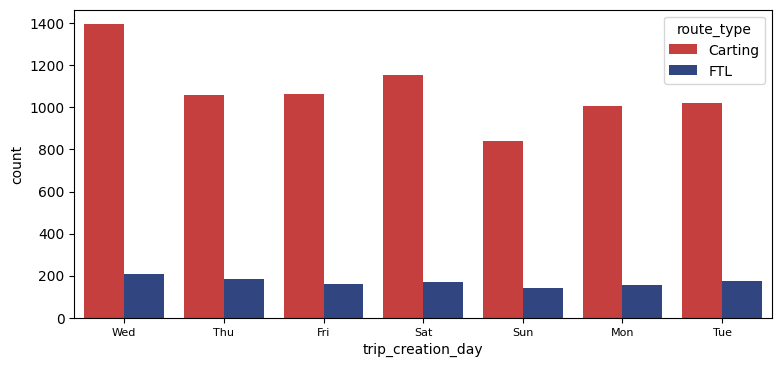

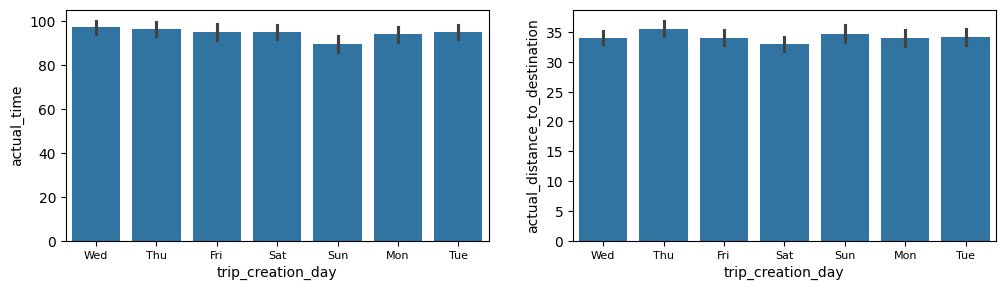

In [1483]:
aero_blue = "#243e8d"
aero_grey = "#808080"
aero_red = "#db2926"
colors = [aero_red, aero_blue, aero_grey]

plt.suptitle("Day wise Trends", size = 18, fontweight = "medium")

plt.figure(figsize = (9,4))
plt.subplot(1,1,1)
sns.countplot(data=df, x='trip_creation_day', hue='route_type', palette=colors)
plt.xticks(fontsize=8)

plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.barplot(data=df, x='trip_creation_day', y='actual_time')
plt.xticks(fontsize=8)

plt.subplot(1,2,2)
sns.barplot(data=df, x='trip_creation_day', y='actual_distance_to_destination')
plt.xticks(fontsize=8)

plt.show()

**Observations**
1.   Most number of deliveries are dispatched during mid of the week which is between Tuesday and Friday for both Carting and FTL types.



In [1484]:
df_hour=df.groupby(by="trip_creation_hour")["trip_uuid"].count().to_frame().reset_index()
df_hour.head()

,trip_creation_hour,trip_uuid
0,0,651
1,1,386
2,2,427
3,3,463
4,4,443


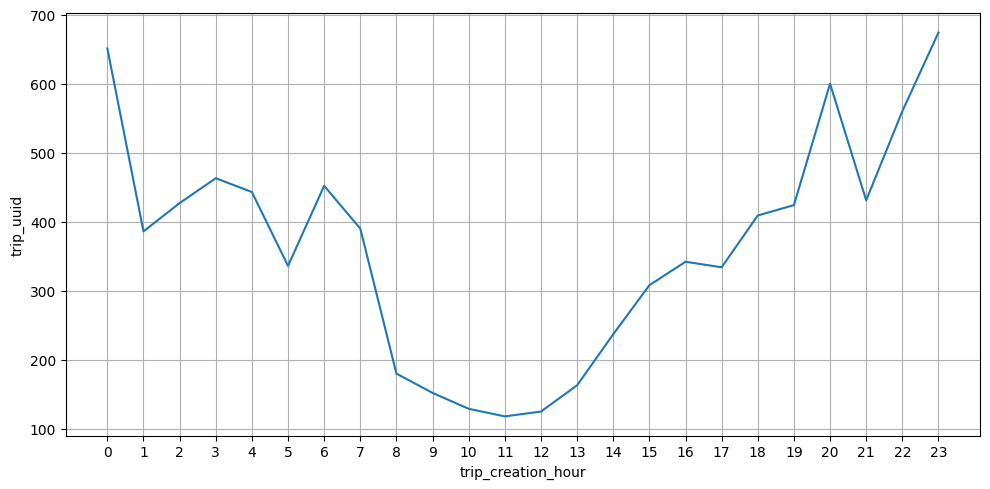

In [1485]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_hour,x=df_hour["trip_creation_hour"], y=df_hour["trip_uuid"] )
plt.xticks(np.arange(0,24))
plt.grid("both")
plt.tight_layout()
plt.show()

**Observation:**
* It can be inferred from the above plot, that the number of trips started increasing after the noon, becomes maximum at 10 PM and then starts decreasing.

**Hypothesis** **testing**


1. Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.



*   Null Hypothesis ( H0 ):od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

*   Alternate Hypothesis ( HA ): od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.


  2.Checking for basic assumpitons for the hypothesis:



*  Distribution check using
QQ Plot

*  Homogeneity of Variances using
Lavene's test


3.   Define Test statistics; Distribution of T under H0.--If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the nonparametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.


4.   Compute the p-value and set alpha value be to 0.05
5.   If p value< alpha: Reject Ho, p value> alpha: Accept Ho




















* **QQ plot: To check normality**

[]

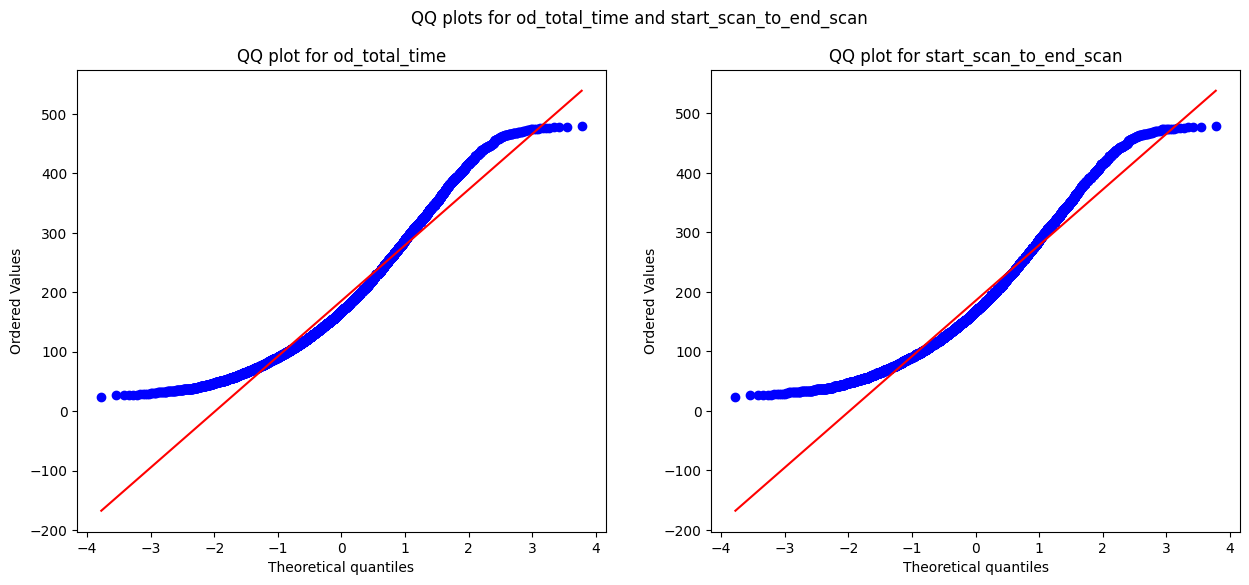

In [1486]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
spy.probplot(df['od_total_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
spy.probplot(df['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

**Observations:** We observe that total time and start scan to end scan are not normally distributed. Hence, we perform Shapiro-Wilk test of normality
*   Ho: Sample follows normal distribution
*   Ha: Sample does not follow normal distribution




In [1487]:
test_stat, p_value = spy.shapiro(df['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.3461751048382927e-37
The sample does not follow normal distribution


In [1488]:
test_stat, p_value = spy.shapiro(df['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.0365852406720264e-37
The sample does not follow normal distribution




**Homogeneity of Variances using Levene's test**
*   Ho: Sample has homogenous varriance
*   Ha: Sample does not have homogenous varriance





In [1489]:
test_stat, p_value = spy.levene(df['od_total_time'], df['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9319576263983587
The samples have Homogenous Variance 


**Observations:**
* Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [1490]:
test_stat, p_value = spy.mannwhitneyu(df['od_total_time'], df['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.6568186023889078


**Observations:**
* Since p-value > alpha therfore it can be concluded that the mean of od_total_time and start_scan_to_end_scan are similar.

2. **Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**





* **QQ plot for normality distribution:**

[]

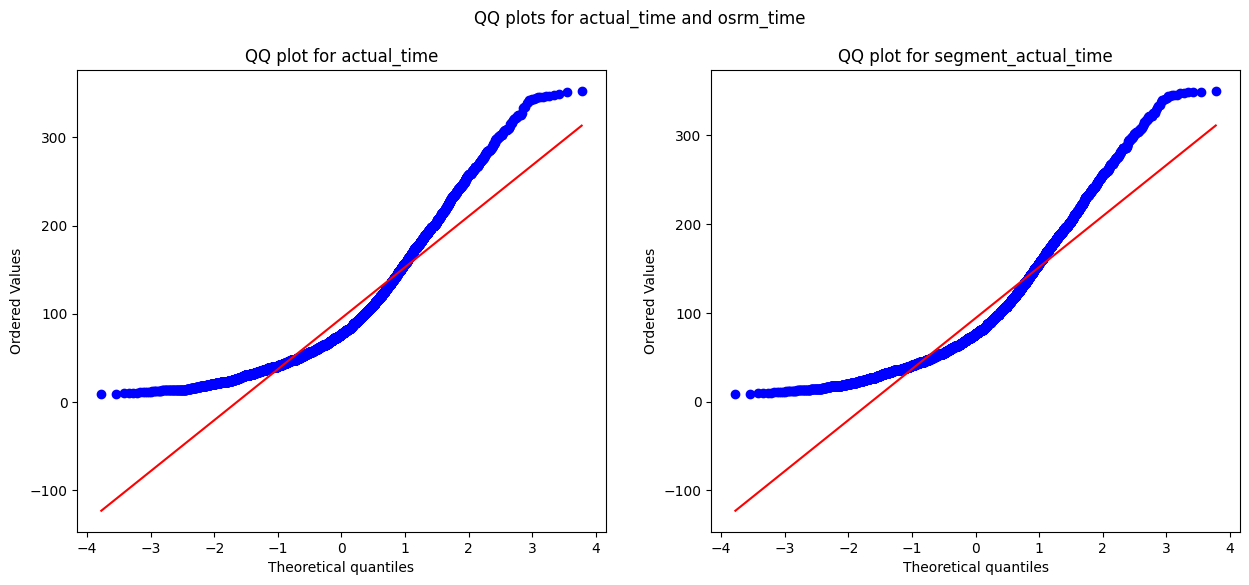

In [1491]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

* **Shapiro-Wilk test of Normality**

In [1492]:
test_stat, p_value = spy.shapiro(df['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.992130456425146e-50
The sample does not follow normal distribution


In [1493]:
test_stat, p_value = spy.shapiro(df['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.687945697802934e-50
The sample does not follow normal distribution


Leven's test for varraince

In [1494]:
test_stat, p_value = spy.levene(df['actual_time'], df["segment_actual_time"])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.5899257563473177
The samples have Homogenous Variance 


In [1495]:
test_stat, p_value = spy.mannwhitneyu(df['actual_time'], df['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.23652064800465944
The samples are similar 


**Observations:**
* We conclude that,Since p-value > alpha therfore it can be concluded that the mean of actual time and segment_actual_time are similar.

3. **Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**


**QQ plot for Normality**

[]

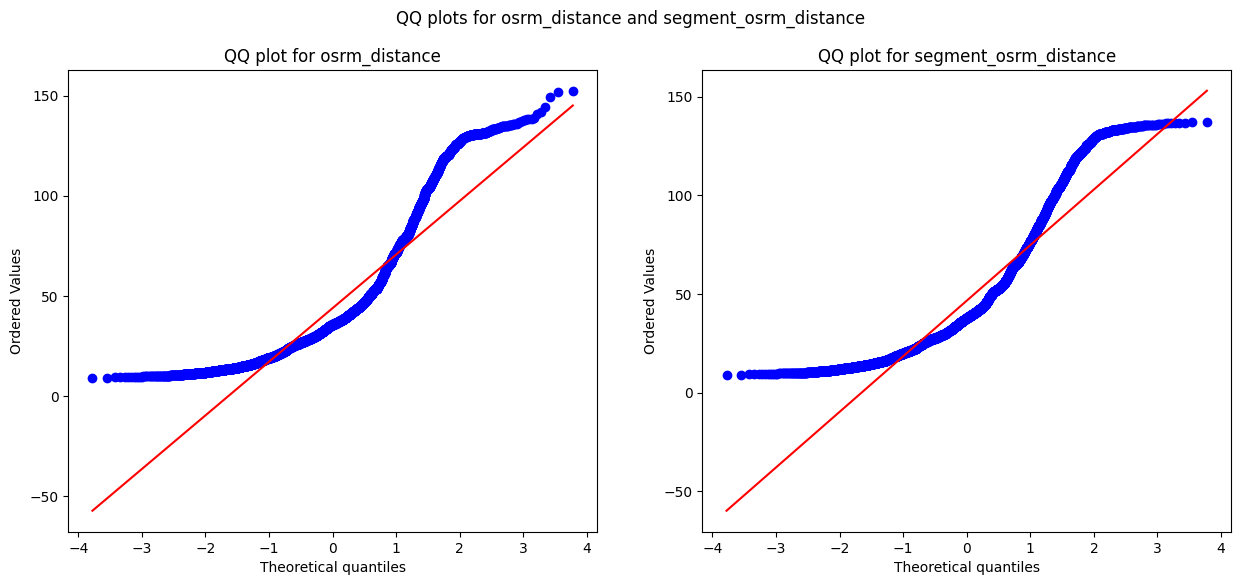

In [1496]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

**Shapiro-Wilk test**

In [1497]:
test_stat, p_value = spy.shapiro(df['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.478052377553121e-56
The sample does not follow normal distribution


In [1498]:
test_stat, p_value = spy.shapiro(df['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.7620639613233005e-52
The sample does not follow normal distribution


**Levene's test for varriance**

In [1499]:
test_stat, p_value = spy.levene(df['osrm_distance'], df['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 4.0301907511660975e-07
The samples do not have Homogenous Variance


**Observations:**
* Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [1500]:
test_stat, p_value = spy.mannwhitneyu(df['osrm_distance'], df['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 4.738210070601972e-11
The samples are not similar


**Observations:**
* Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are not similar.

4. **Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

* **QQ plot for normality**

[]

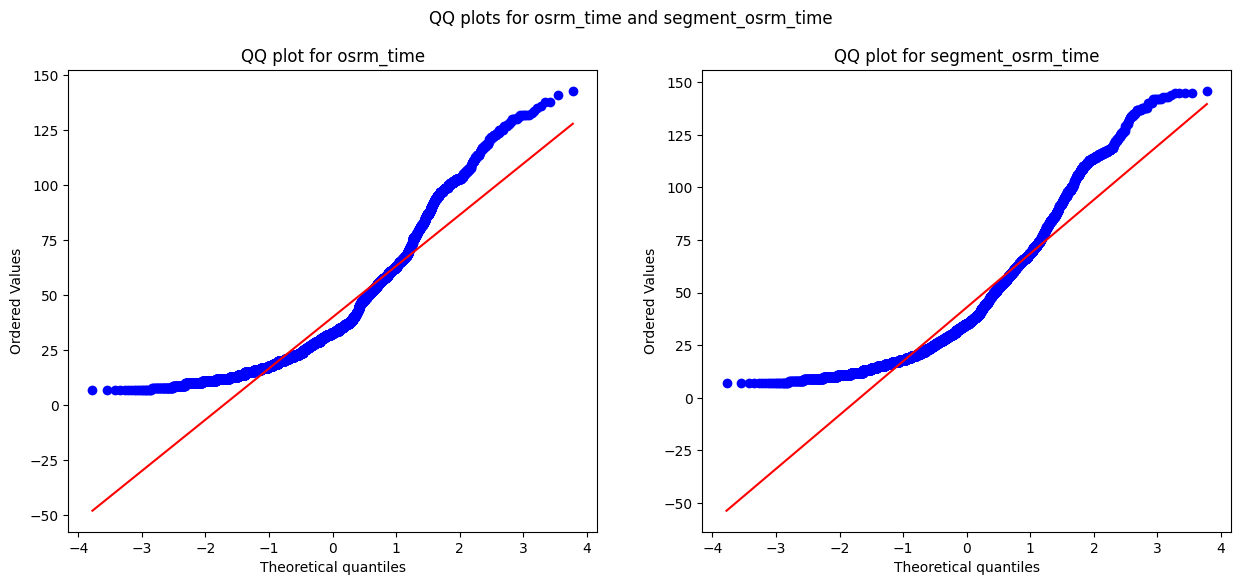

In [1501]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

* **Shapiro-Wilk test for normality**

In [1502]:
test_stat, p_value = spy.shapiro(df['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.6814737350645426e-50
The sample does not follow normal distribution


In [1503]:
test_stat, p_value = spy.shapiro(df['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.2487760644677598e-48
The sample does not follow normal distribution


* **Levene's test**

In [1504]:
test_stat, p_value = spy.levene(df['osrm_time'], df['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.7614929417581122e-15
The samples do not have Homogenous Variance


**Observations:**
* Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [1505]:
test_stat, p_value = spy.mannwhitneyu(df['osrm_time'], df['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 7.564533251582031e-10
The samples are not similar


**Observations:**
* Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are not similar.

**One-Hot Encoding of Categorical Variables**

In [1506]:
df['route_type'].value_counts()

,count
route_type,
Carting,7542
FTL,1192


* **Performing one-hot label encoding on route type column**

In [1507]:
label_encoder= LabelEncoder()
df["route_type"]=label_encoder.fit_transform(df["route_type"])

In [1508]:
df['route_type'].value_counts() #after one-hot encoding

,count
route_type,
0,7542
1,1192


* **Performing one-hot label encoding on data column**

In [1509]:
df['data'].value_counts()

,count
data,
training,6195
test,2539


In [1510]:
label_encoder = LabelEncoder()
df['data'] = label_encoder.fit_transform(df['data'])

In [1511]:
df['data'].value_counts()

,count
data,
1,6195
0,2539


**Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

[]

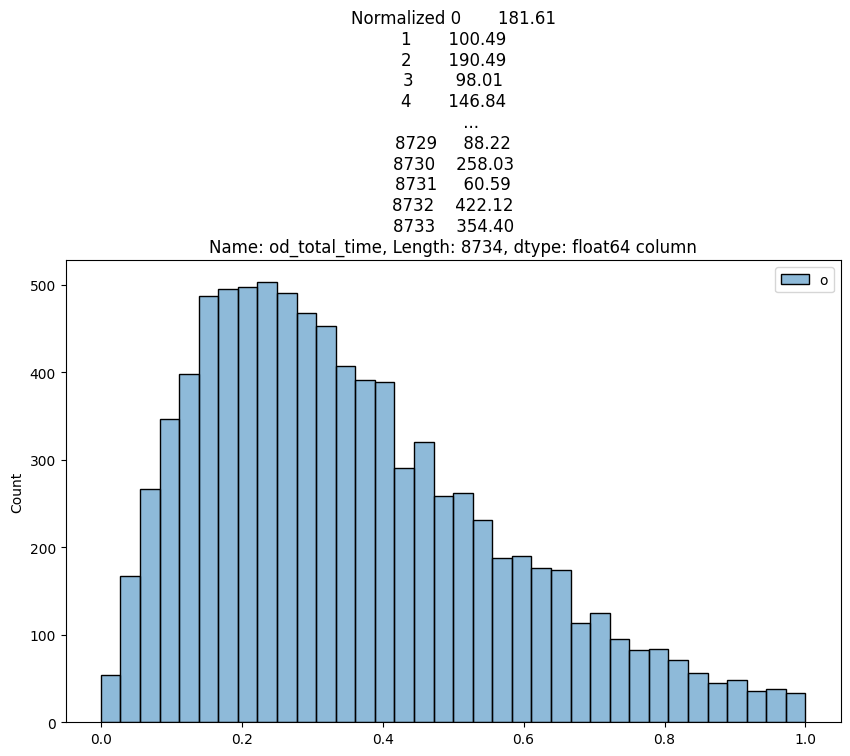

In [1512]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

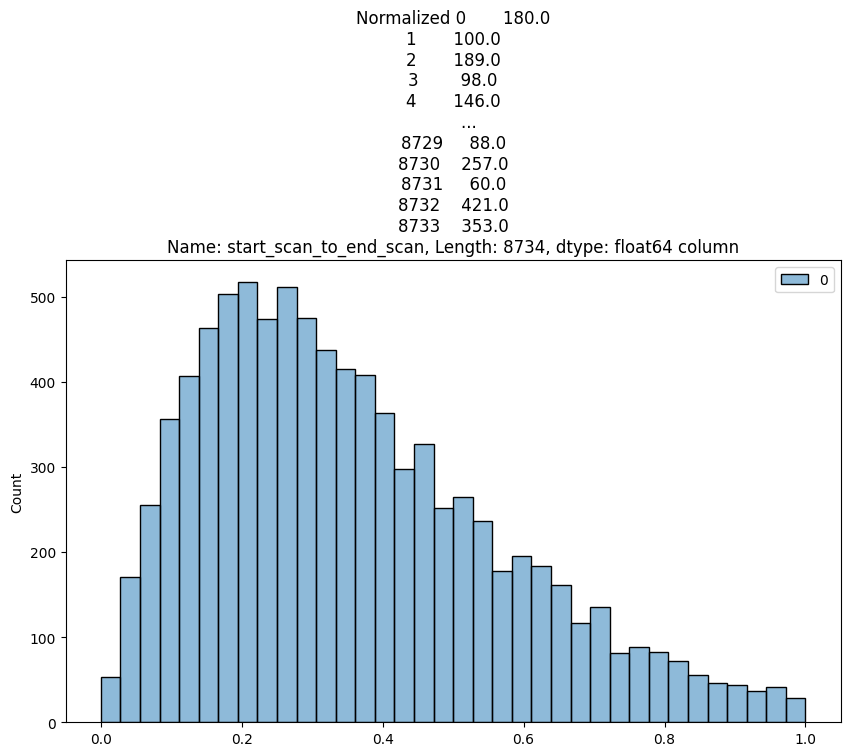

In [1513]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['start_scan_to_end_scan']} column")
plt.plot()

[]

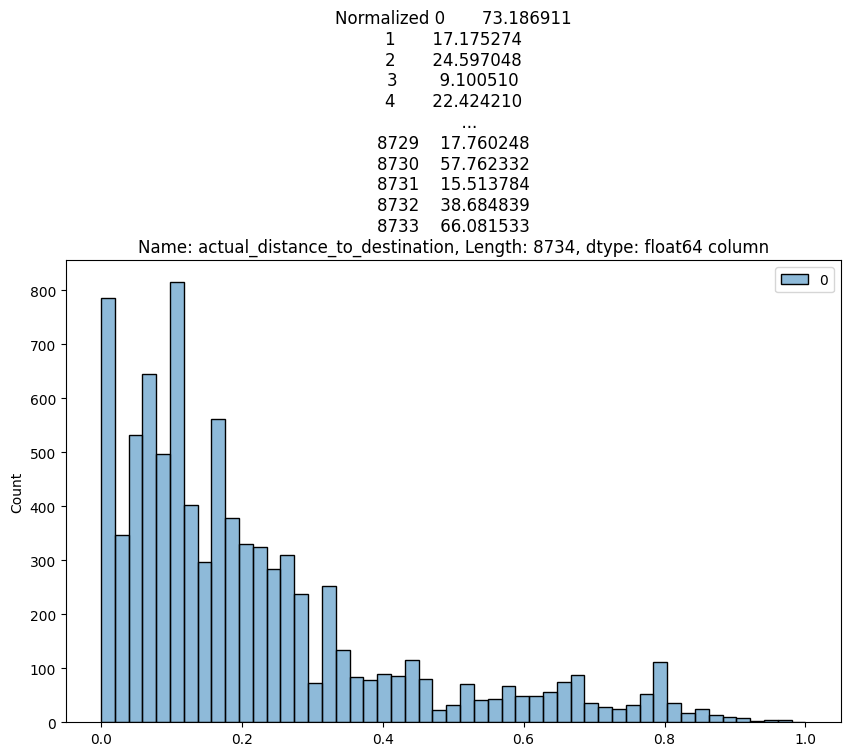

In [1514]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['actual_distance_to_destination']} column")
plt.plot()

[]

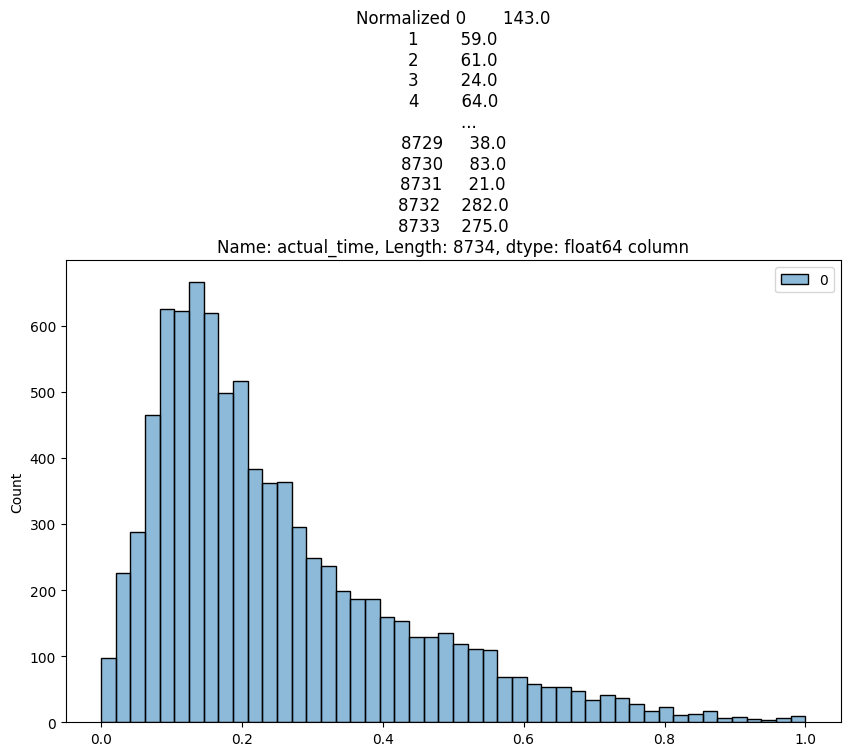

In [1515]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['actual_time']} column")
plt.plot()

[]

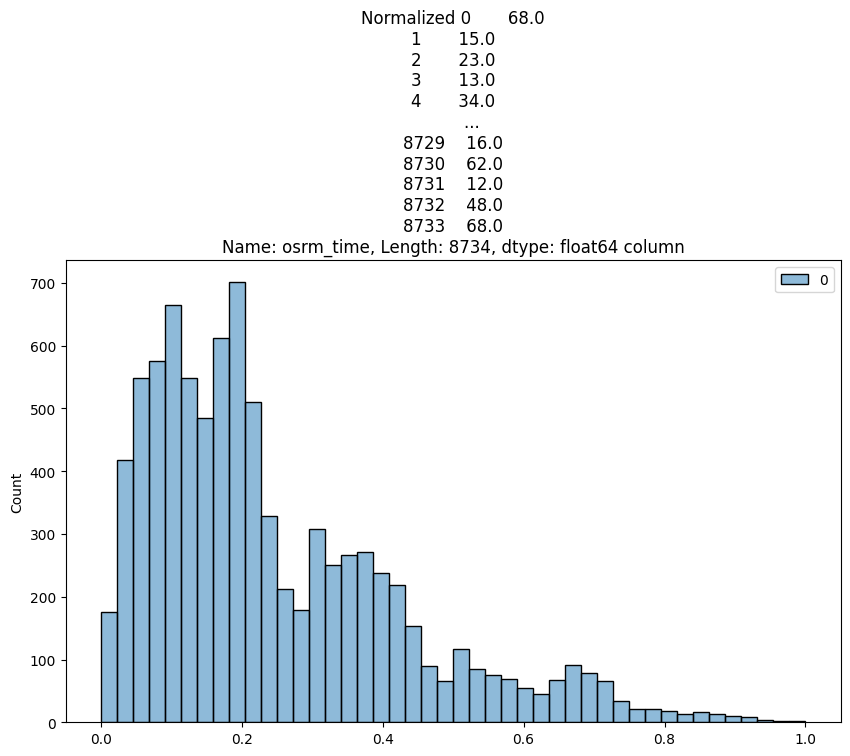

In [1516]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['osrm_time']} column")
plt.plot()

[]

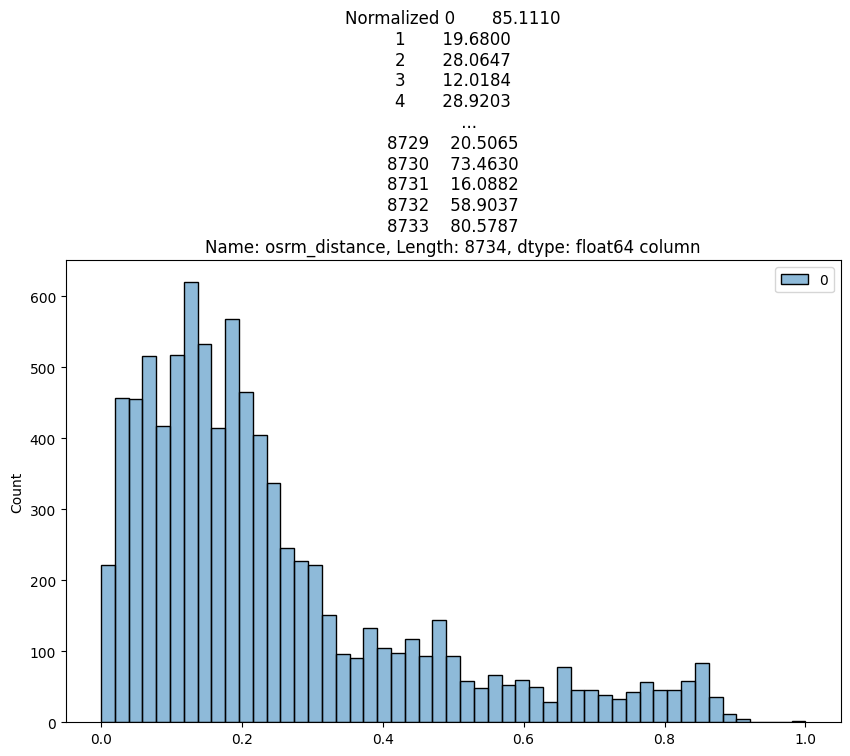

In [1517]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['osrm_distance']} column")
plt.plot()

[]

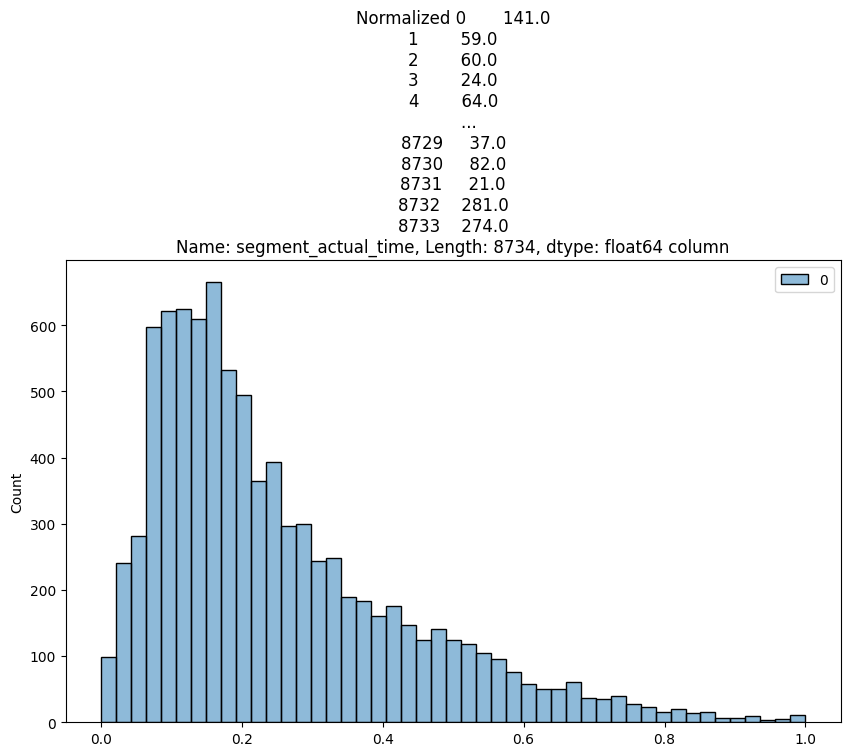

In [1518]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['segment_actual_time']} column")
plt.plot()

[]

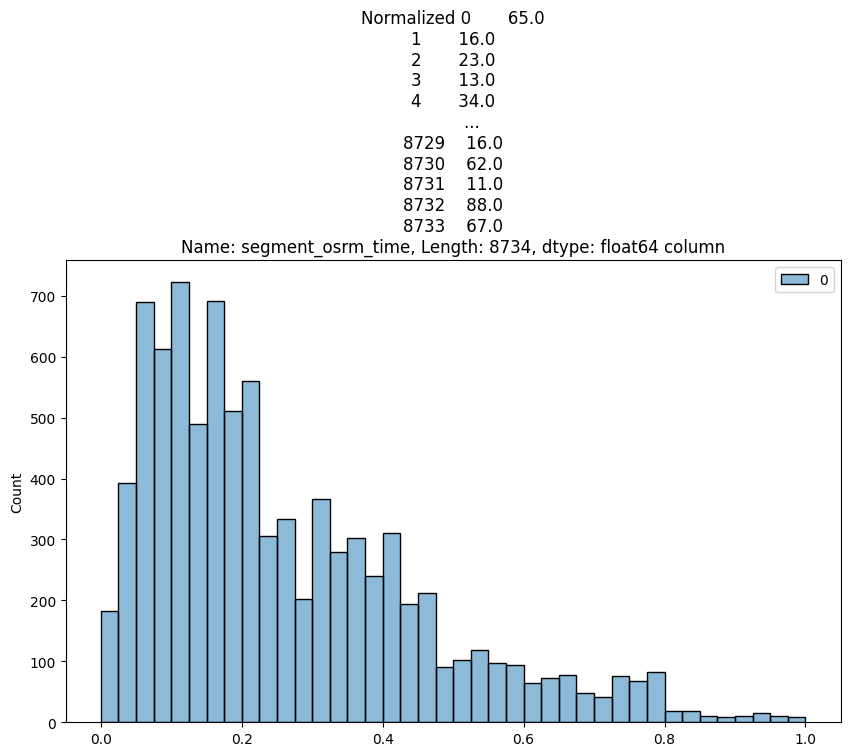

In [1519]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['segment_osrm_time']} column")
plt.plot()

[]

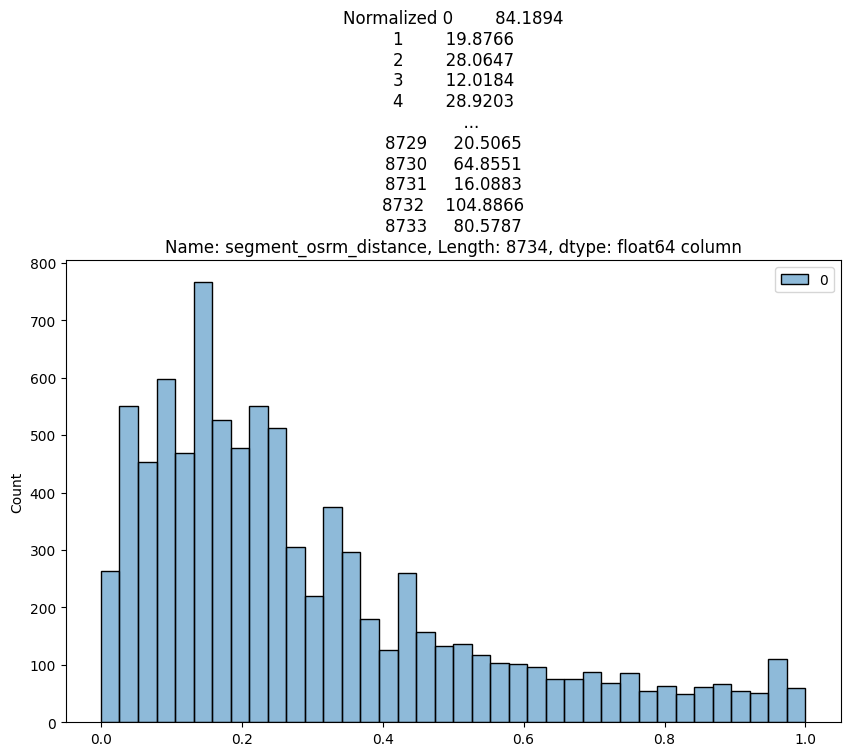

In [1520]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df['segment_osrm_distance']} column")
plt.plot()

Standardization of numerical columns

[]

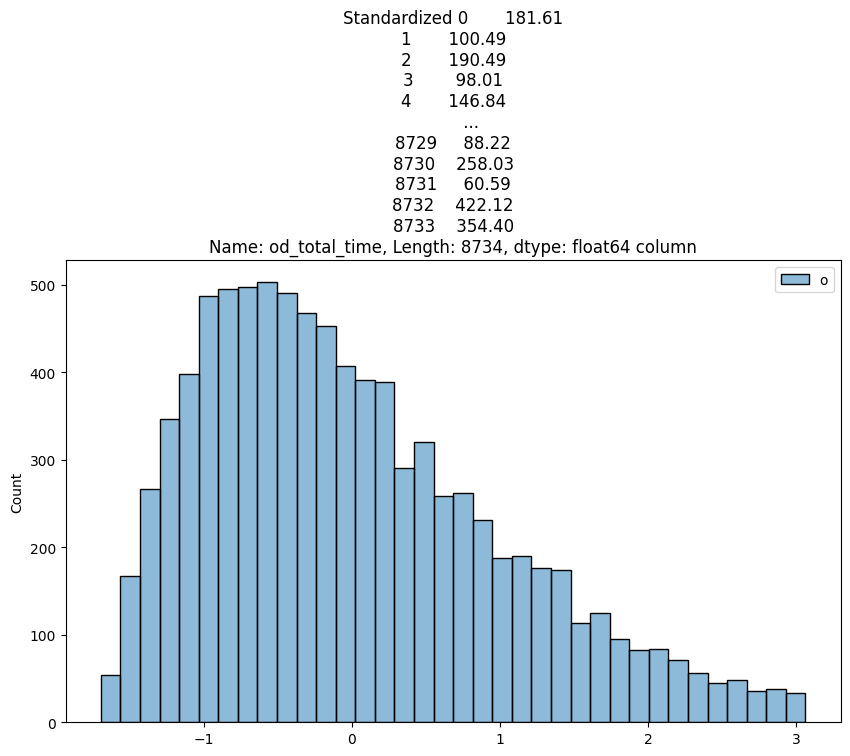

In [1521]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

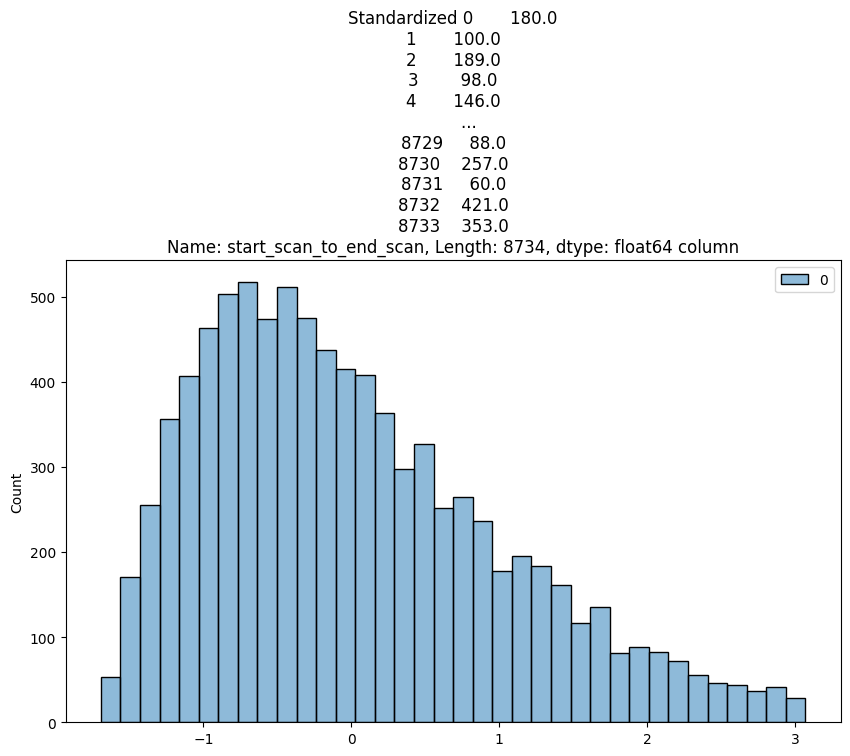

In [1522]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['start_scan_to_end_scan']} column")
plt.plot()

[]

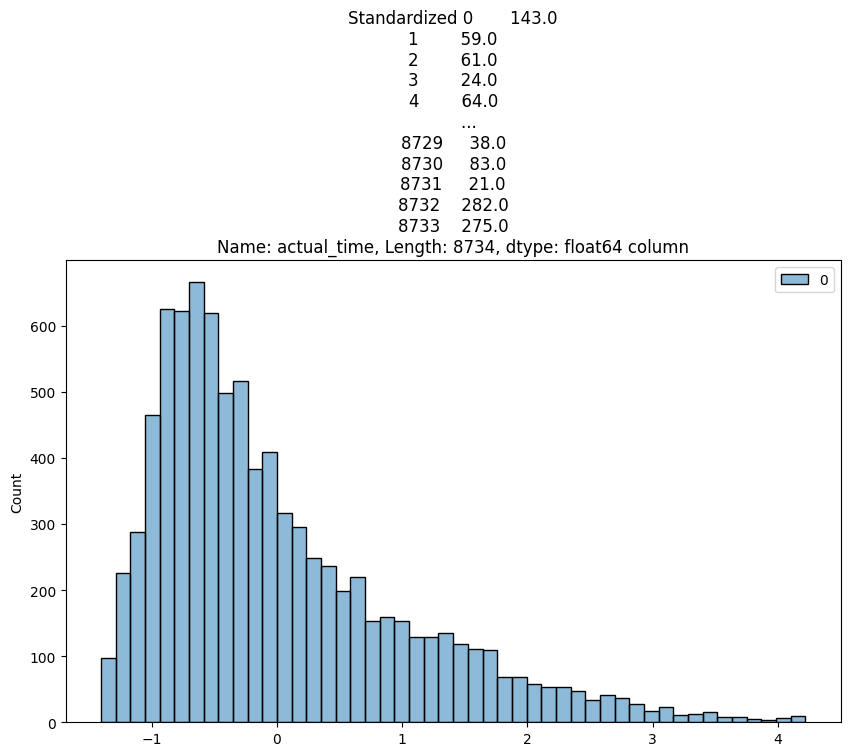

In [1523]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['actual_time']} column")
plt.plot()

[]

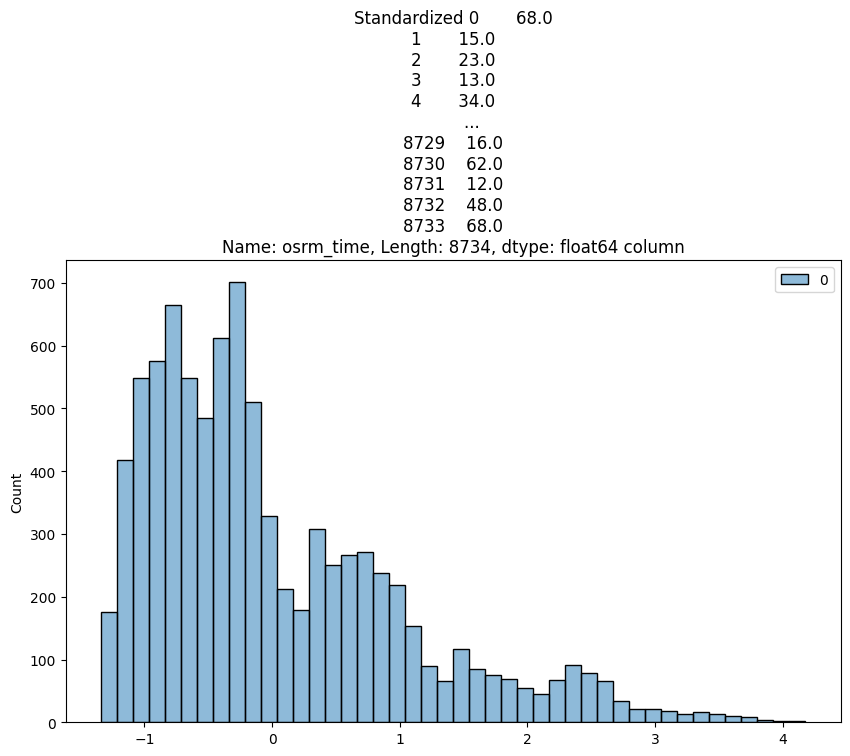

In [1524]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['osrm_time']} column")
plt.plot()

[]

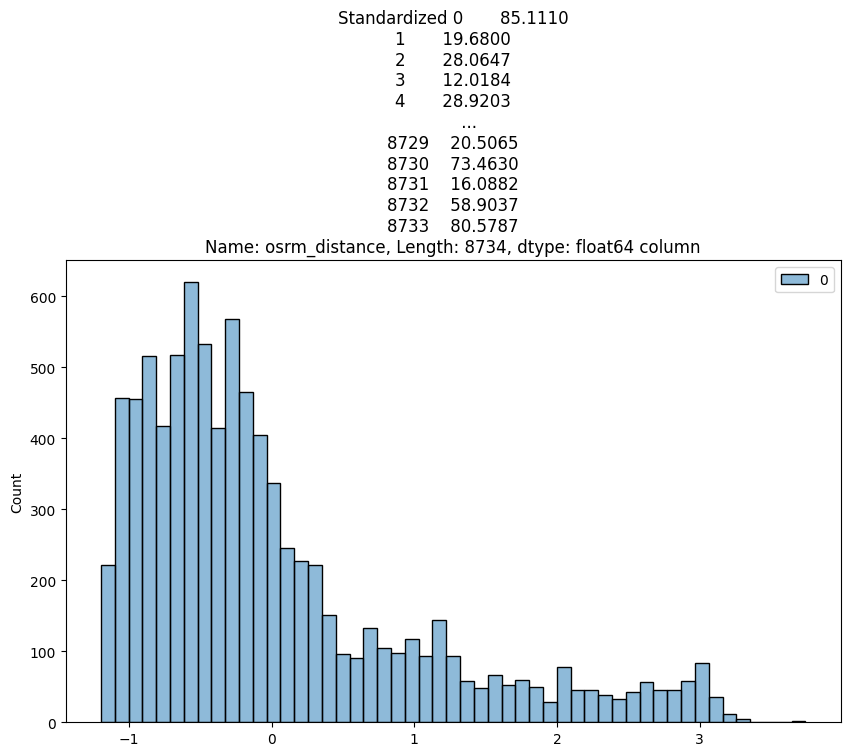

In [1525]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['osrm_distance']} column")
plt.plot()

[]

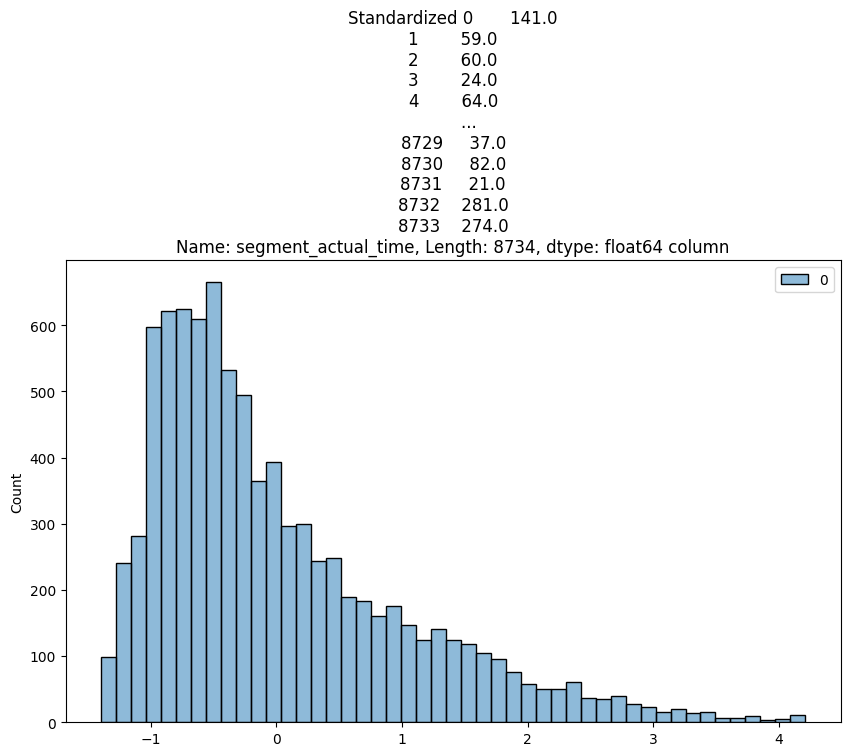

In [1526]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['segment_actual_time']} column")
plt.plot()

[]

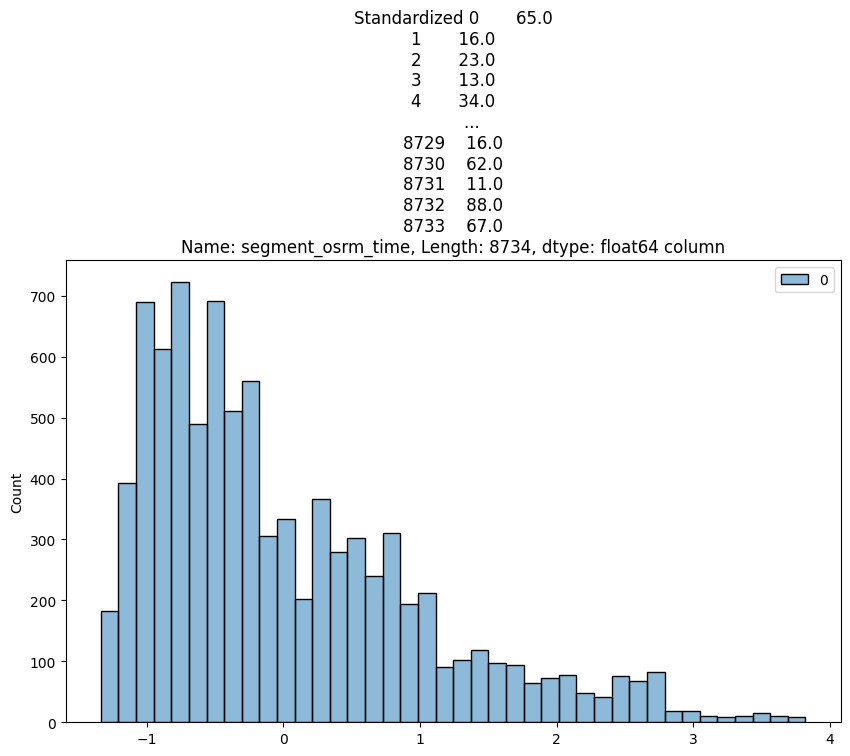

In [1527]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['segment_osrm_time']} column")
plt.plot()

[]

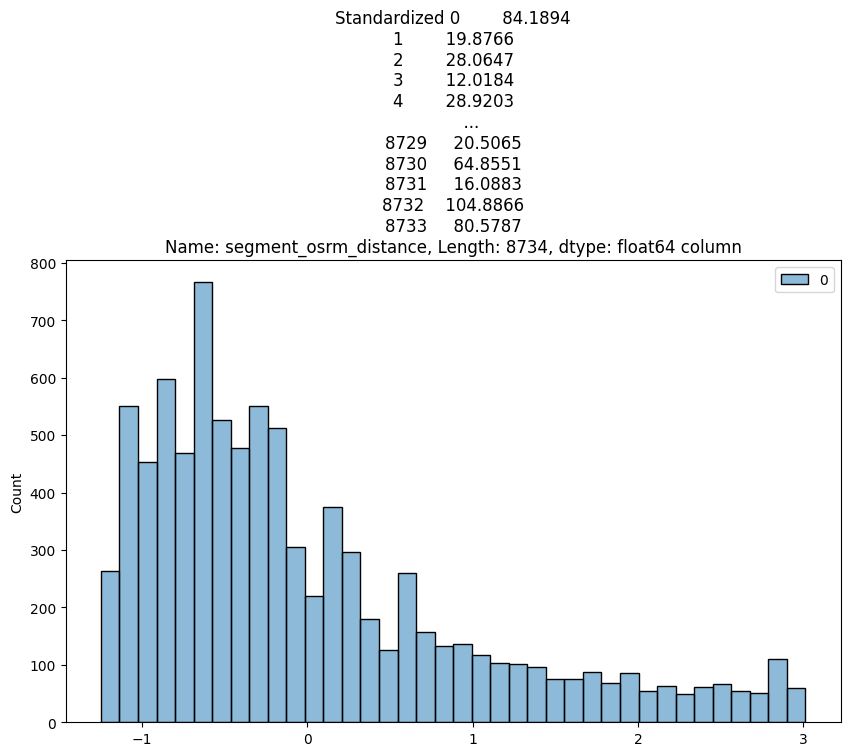

In [1528]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df['segment_osrm_distance']} column")
plt.plot()

In [1529]:
df

,trip_uuid,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,...,source_state,source_city,source_place,destination_state,destination_city,destination_place,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour
0,trip-153671042288605164,1,0,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,...,Karnataka,Doddablpur,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,Wed,Sep,2018,0
1,trip-153671046011330457,1,0,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,...,Maharashtra,Mumbai Hub,,Maharashtra,Mumbai,MiraRd_IP,Wed,Sep,2018,0
2,trip-153671055416136166,1,0,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,...,Tamil Nadu,Chennai,Poonamallee,Tamil Nadu,Chennai,Poonamallee,Wed,Sep,2018,0
3,trip-153671066201138152,1,0,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,...,Tamil Nadu,Chennai,Chrompet_DPC,Tamil Nadu,Chennai,Vandalur_Dc,Wed,Sep,2018,0
4,trip-153671066826362165,1,0,146.0,22.424210,64.0,34.0,28.9203,64.0,34.0,...,Karnataka,HBR Layout PC,,Karnataka,HBR Layout PC,,Wed,Sep,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,trip-153861091843037040,0,0,88.0,17.760248,38.0,16.0,20.5065,37.0,16.0,...,Maharashtra,Mumbai Hub,,Maharashtra,Mumbai,MiraRd_IP,Wed,Oct,2018,23
8730,trip-153861095625827784,0,0,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,...,Punjab,Chandigarh,Mehmdpur_H,Punjab,Chandigarh,Mehmdpur_H,Wed,Oct,2018,23
8731,trip-153861104386292051,0,0,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,...,Haryana,FBD,Balabhgarh_DPC,Haryana,Faridabad,Blbgarh_DC,Wed,Oct,2018,23
8732,trip-153861106442901555,0,0,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,...,Uttar Pradesh,Kanpur,GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr_DC,Wed,Oct,2018,23


**Business Insights**


*   The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
*  There are about 14817 unique trip IDs, 1508 unique source centers, 1481 unique destination_centers, 690 unique source cities, 806 unique destination cities.
*    Most of the data is for testing than for training.
*   Most common route type is Carting.
*   The number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

*   Most orders come mid-month. That means customers usually make more orders in the mid of the month.
*    Most orders are sourced from the states like Maharashtra, Karnataka, Haryana, Tamil Nadu, Telangana

*   Maximum number of trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.
*  Maximum number of trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high.
*   Most orders in terms of destination are coming from cities like bengaluru, mumbai, gurgaon, bangalore, Delhi.
*   Maximum number of trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.







